In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from data_read import load_data_into_dataframe

#enable IPython to display matplolib graphs
%matplotlib inline

In [2]:
h_df = load_data_into_dataframe("halfhourly")
h_df.head()

/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_thesis/data_read.py:39: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(file) for file in dataset_files_csv), ignore_index=True)
/home/daniel/Bachelor/Bachelor_t

,LCLid,tstp,energy(kWh/hh)
0,MAC000239,2011-12-02 10:00:00.0000000,0.261
1,MAC000239,2011-12-02 10:30:00.0000000,0.138
2,MAC000239,2011-12-02 11:00:00.0000000,0.089
3,MAC000239,2011-12-02 11:30:00.0000000,0.1
4,MAC000239,2011-12-02 12:00:00.0000000,0.236


In [3]:
h_df.shape

(167817021, 3)

In [4]:
h_df.describe

<bound method NDFrame.describe of                LCLid                         tstp energy(kWh/hh)
0          MAC000239  2011-12-02 10:00:00.0000000         0.261 
1          MAC000239  2011-12-02 10:30:00.0000000         0.138 
2          MAC000239  2011-12-02 11:00:00.0000000         0.089 
3          MAC000239  2011-12-02 11:30:00.0000000           0.1 
4          MAC000239  2011-12-02 12:00:00.0000000         0.236 
...              ...                          ...            ...
167817016  MAC004303  2013-09-09 22:00:00.0000000         0.055 
167817017  MAC004303  2013-09-09 22:30:00.0000000         0.072 
167817018  MAC004303  2013-09-09 23:00:00.0000000         0.061 
167817019  MAC004303  2013-09-09 23:30:00.0000000         0.056 
167817020  MAC004303  2013-09-10 00:00:00.0000000         0.056 

[167817021 rows x 3 columns]>

In [5]:
h_df.dtypes

LCLid             object
tstp              object
energy(kWh/hh)    object
dtype: object

In [6]:
h_df["tstp"]

0            2011-12-02 10:00:00.0000000
1            2011-12-02 10:30:00.0000000
2            2011-12-02 11:00:00.0000000
3            2011-12-02 11:30:00.0000000
4            2011-12-02 12:00:00.0000000
                        ...             
167817016    2013-09-09 22:00:00.0000000
167817017    2013-09-09 22:30:00.0000000
167817018    2013-09-09 23:00:00.0000000
167817019    2013-09-09 23:30:00.0000000
167817020    2013-09-10 00:00:00.0000000
Name: tstp, Length: 167817021, dtype: object

In [7]:
h_df["tstp"] = pd.to_datetime(h_df["tstp"])

In [8]:
h_df.loc[0,"tstp"].year

2011

In [9]:
h_df.set_index("tstp")

,LCLid,energy(kWh/hh)
tstp,,
2011-12-02 10:00:00,MAC000239,0.261
2011-12-02 10:30:00,MAC000239,0.138
2011-12-02 11:00:00,MAC000239,0.089
2011-12-02 11:30:00,MAC000239,0.1
2011-12-02 12:00:00,MAC000239,0.236
...,...,...
2013-09-09 22:00:00,MAC004303,0.055
2013-09-09 22:30:00,MAC004303,0.072
2013-09-09 23:00:00,MAC004303,0.061


In [10]:
h_df["energy(kWh/hh)"] = pd.to_numeric(h_df["energy(kWh/hh)"], downcast="float", errors="coerce")

In [11]:
type(h_df.loc[0,"energy(kWh/hh)"])

numpy.float32

In [16]:
affluenthh_filt = h_df["LCLid"] == "MAC000002"
aff_hh_df = h_df[affluenthh_filt]
aff_hh_df = aff_hh_df.set_index("tstp")

ERROR! Session/line number was not unique in database. History logging moved to new session 203


In [17]:
aff_hh_df.head()

,LCLid,energy(kWh/hh)
tstp,,
2012-10-12 00:30:00,MAC000002,0.0
2012-10-12 01:00:00,MAC000002,0.0
2012-10-12 01:30:00,MAC000002,0.0
2012-10-12 02:00:00,MAC000002,0.0
2012-10-12 02:30:00,MAC000002,0.0


In [18]:
aff_hh_df.dtypes

LCLid              object
energy(kWh/hh)    float32
dtype: object

<AxesSubplot:xlabel='tstp', ylabel='energy(kWh/hh)'>

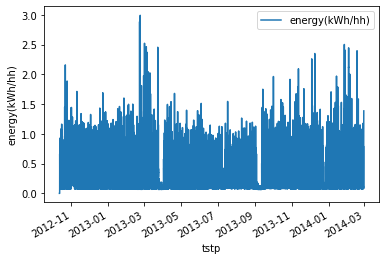

In [22]:
aff_hh_df.plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)" )

<AxesSubplot:title={'center':'1st jan 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

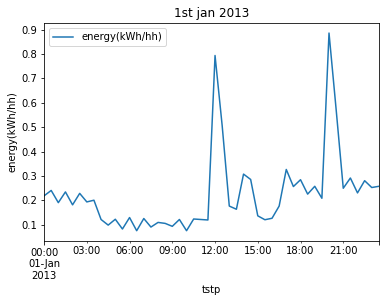

In [31]:
aff_hh_df.loc["2013-01-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title = "1st jan 2013" )

<AxesSubplot:title={'center':'1st august 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

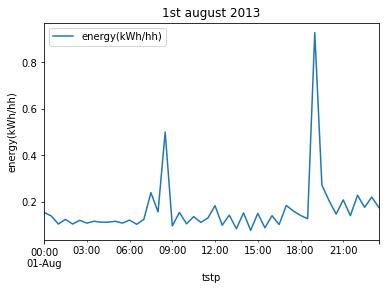

In [26]:
aff_hh_df.loc["2013-08-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="1st august 2013")

<AxesSubplot:title={'center':'1st march 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

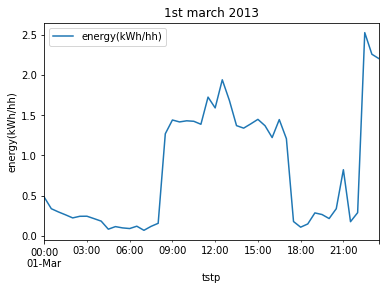

In [29]:
aff_hh_df.loc["2013-03-01"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="1st march 2013" )

<AxesSubplot:title={'center':'jan 2013'}, xlabel='tstp', ylabel='energy(kWh/hh)'>

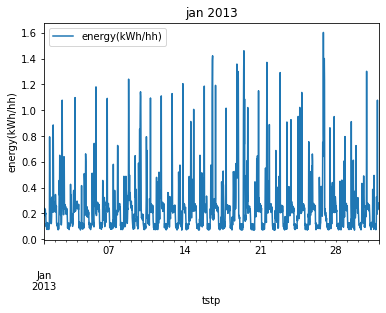

In [30]:
aff_hh_df.loc["2013-01-01":"2013-01-31"].plot( y ="energy(kWh/hh)", ylabel = "energy(kWh/hh)", title="jan 2013" )